In [1]:
# importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import  resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle

In [2]:
# data collection   and processing
data=pd.read_csv("Rainfall.csv")


In [3]:
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [4]:
data.shape

(366, 12)

In [5]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [6]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [7]:


data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [8]:
print("Data Info")
data.info()

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [9]:
#remove extra spaces in all columns
data.columns=data.columns.str.strip()
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [11]:
data=data.drop(columns=['day'],axis=1)
data

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [12]:
#checking the number of missing values
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [13]:
#d

In [14]:
#handling the missing values
data['winddirection']=data['winddirection'].fillna(data['winddirection'].mode()[0])#d
data['windspeed']=data['windspeed'].fillna(data['windspeed'].median())

In [15]:
#checking the number of missing values
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [16]:
data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [17]:
#converting the yes & no to 1 &0 respectively
data['rainfall']=data['rainfall'].map({'yes':1,'no':0})

In [18]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


# Exploratory data analysis(eda)

In [19]:
data.shape

(366, 11)

In [20]:
#setting  plot style for all the plots
sns.set(style='whitegrid')

In [21]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [22]:
 data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

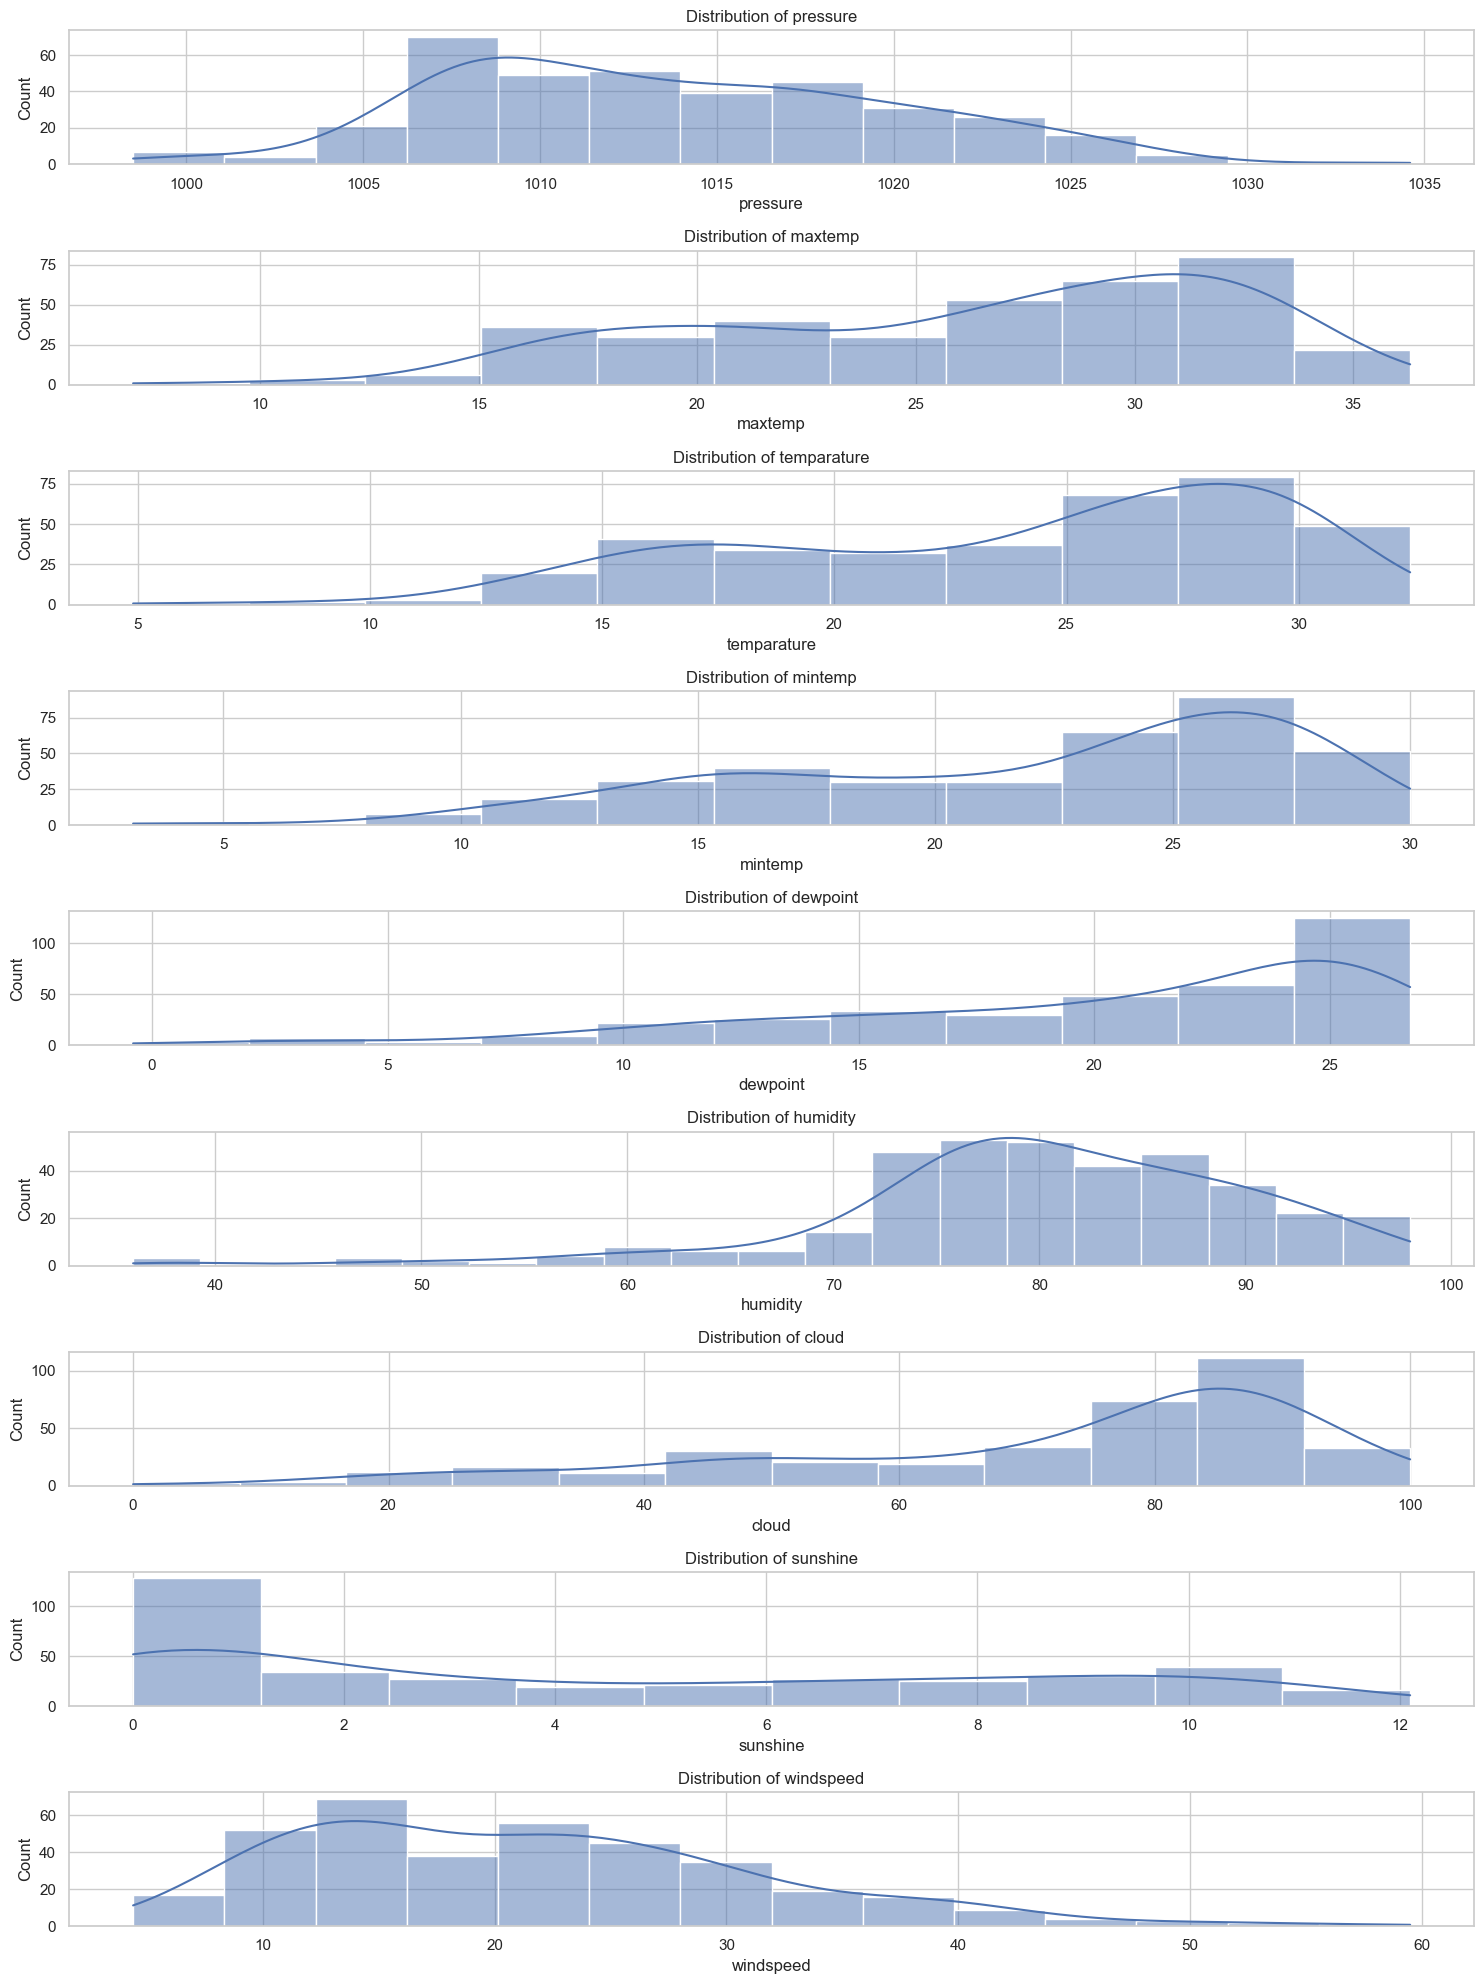

In [23]:
plt.figure(figsize=(15,20))
for i ,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'],1):
    plt.subplot(9,1,i)
    sns.histplot(data[column],kde=True)
    plt.title("Distribution of {}".format(column))
plt.tight_layout()
plt.show()

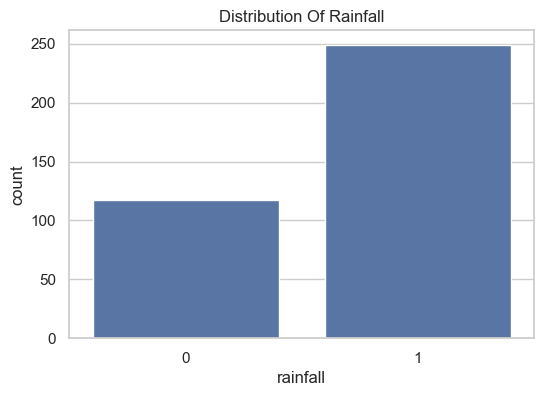

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='rainfall',data=data)
plt.title("Distribution Of Rainfall")
plt.show()

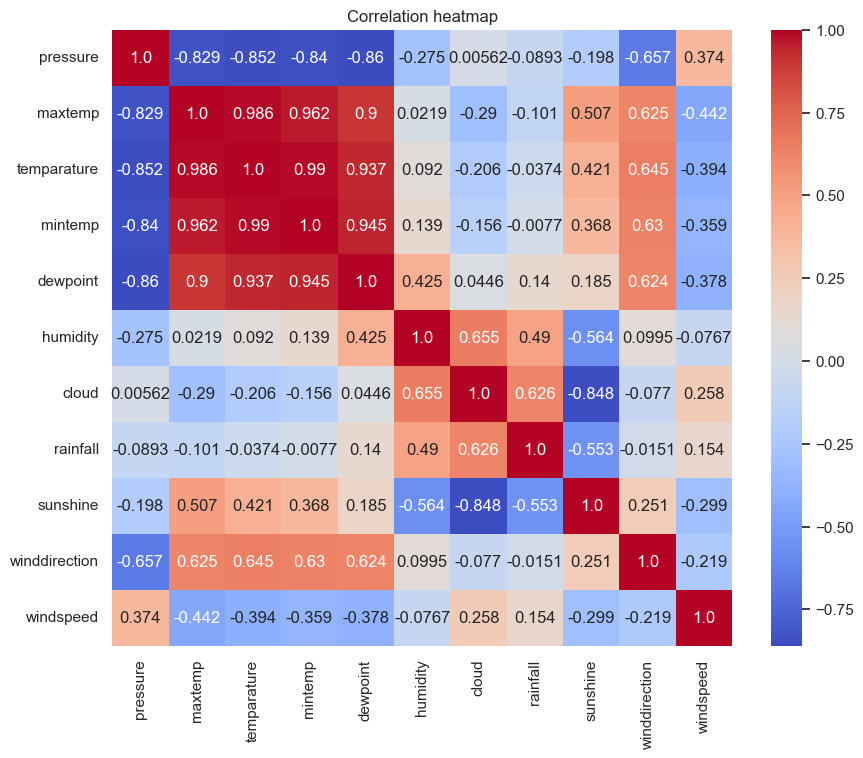

In [25]:
#correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt=".3")
plt.title("Correlation heatmap")
plt.show()

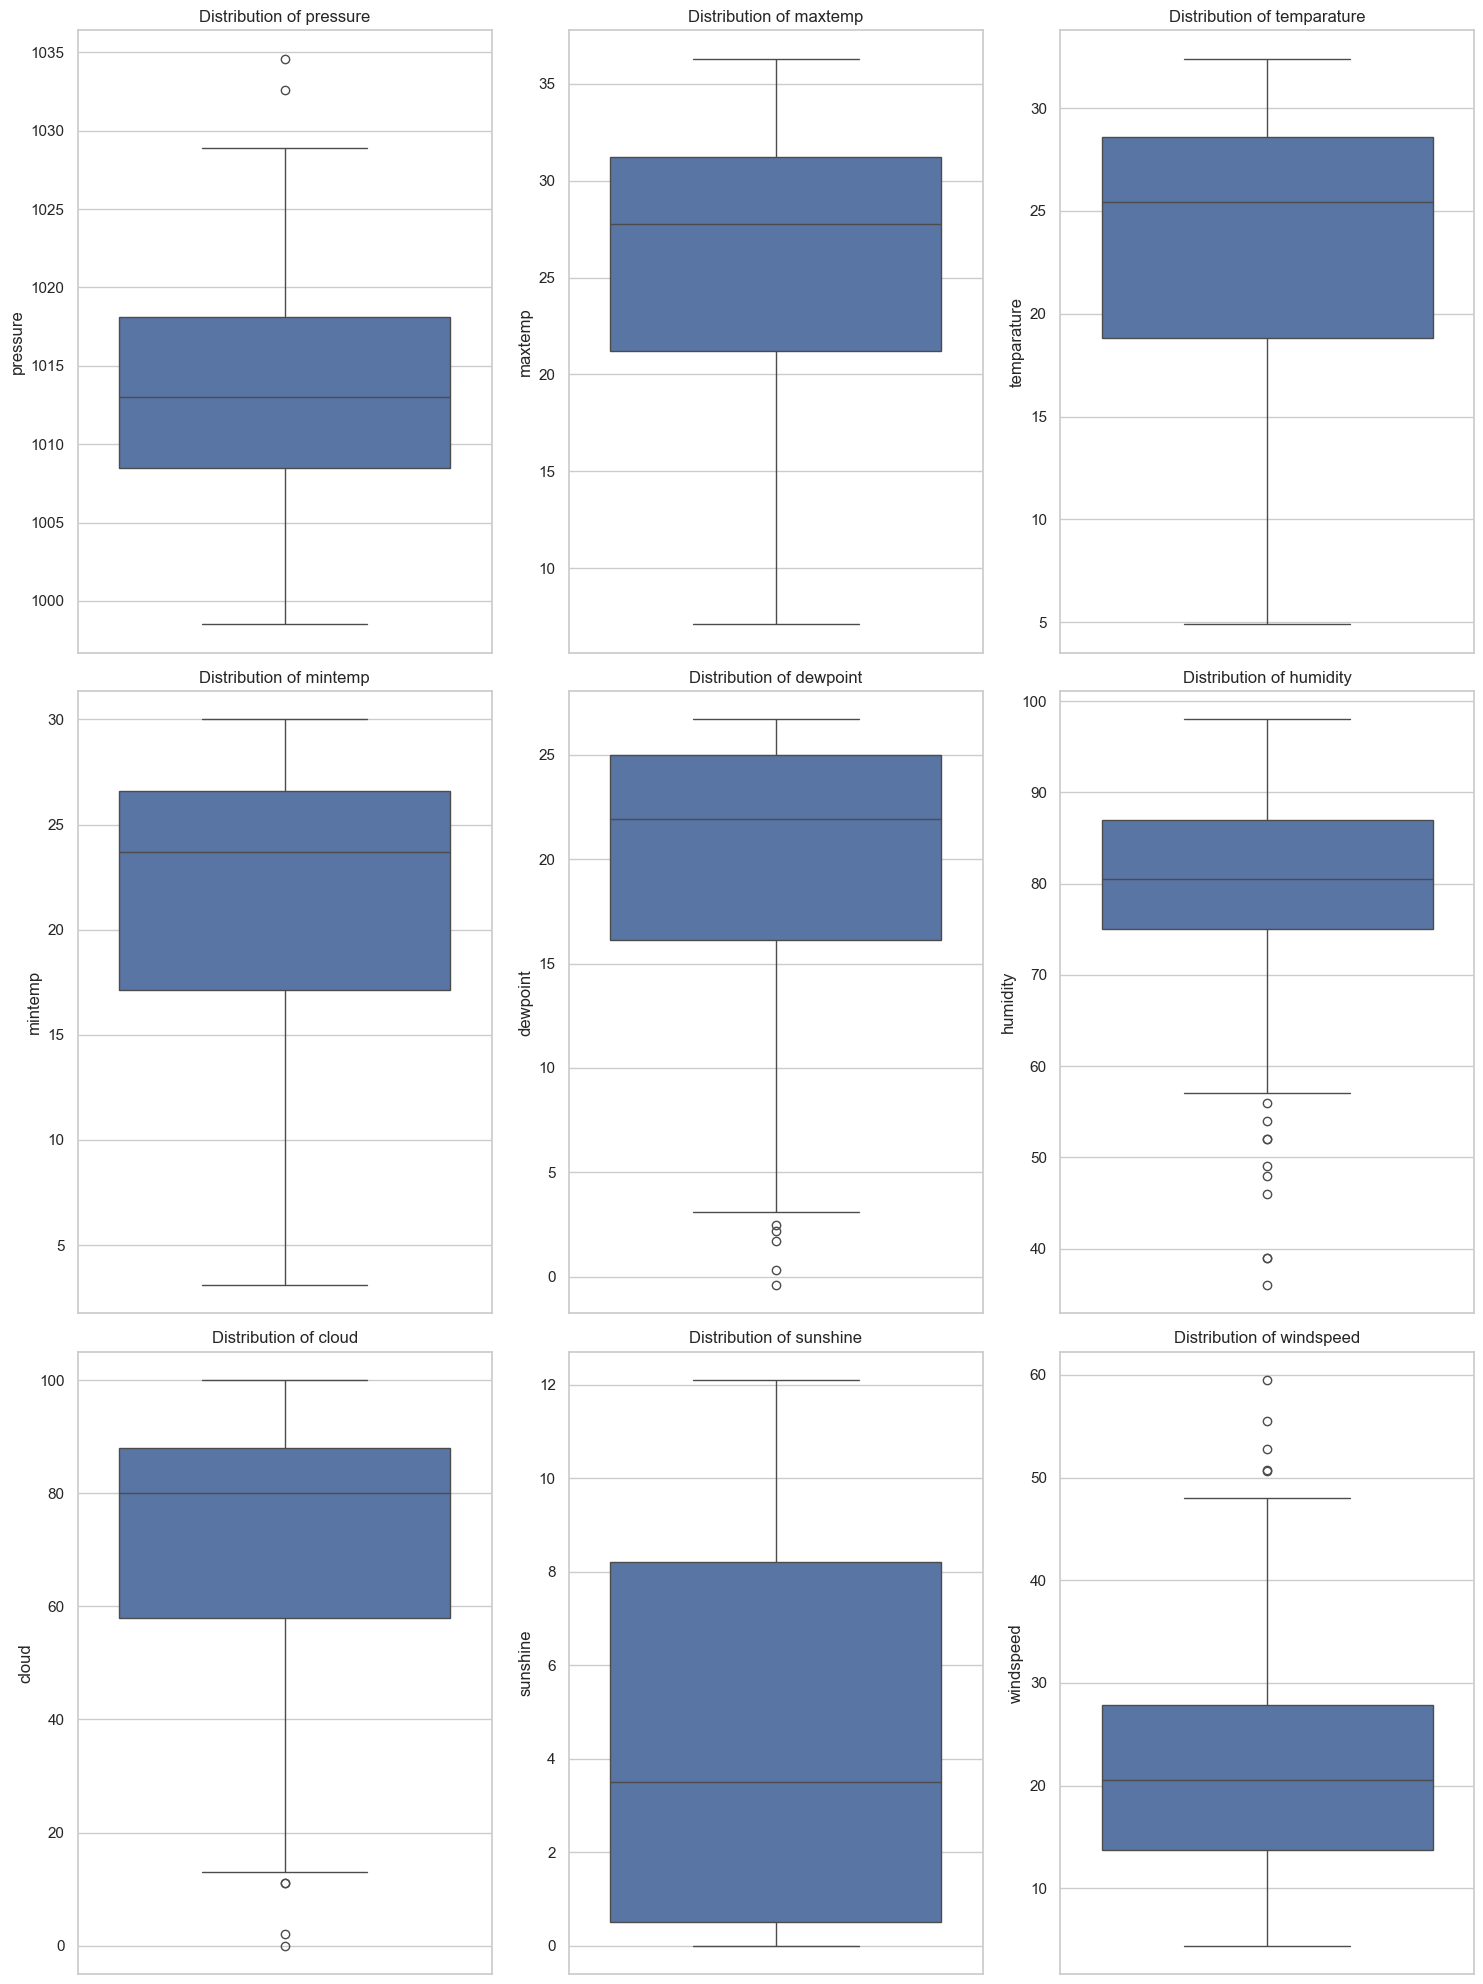

In [26]:
plt.figure(figsize=(15,20))
for i ,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.boxplot(data[column])
    plt.title("Distribution of {}".format(column))
plt.tight_layout()
plt.show()

#  DATA PREPROCESSING

In [27]:
# drop highly correlated column
data=data.drop(columns=['maxtemp','temparature','mintemp'])

In [28]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [29]:
print(data.rainfall.value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [30]:
# separate majority and minority class
df_majority=data[data["rainfall"]==1]
df_minority=data[data["rainfall"]==0]

In [31]:
print(df_majority.shape)
print(df_minority.shape)
#print(data.shape)

(249, 8)
(117, 8)


In [32]:
# downsample majority class to match minority count
df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [33]:
df_majority_downsampled.shape

(117, 8)

In [34]:
df_downsampled=pd.concat([df_majority_downsampled,df_minority])

In [35]:
df_downsampled.shape

(234, 8)

In [36]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [37]:
# shuffle the final dataframe
df_downsampled=df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [38]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [39]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [40]:
x=df_downsampled.drop(columns=['rainfall'])
y=df_downsampled["rainfall"]

In [41]:
print(x)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1022.2      14.1        78     90       0.0           30.0       28.5
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1007.6      24.8        85     84       1.8           70.0       34.8
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1008.1      25.4        86     75       5.7           20.0        9.5
230    1010.1      19.9        91     89       0.0           70.0       31.8
231    1020.6      14.7        91     88       0.3           50.0       24.4
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1005.0      26.1        87     82       2.2          160.0       12.6

[234 rows x 7 columns]


In [42]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [43]:
# spliting the data into training data and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
print(x_train)
print( )
print(x_test)
print(y_train)
print( )
print(y_test)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
117    1024.4      10.1        61     19      10.7           40.0       16.9
155    1024.1      10.0        65     58       5.6           60.0       26.9
148    1012.8      18.0        97     95       0.6           40.0       22.0
158    1014.9      18.2        91     76       0.0           40.0       13.8
231    1020.6      14.7        91     88       0.3           50.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
106    1014.1      25.4        97     86       0.4          100.0       30.4
14     1005.6      20.0        56     53      10.4          230.0       15.5
92     1002.2      25.5        77     70       7.7          350.0       13.6
179    1020.8       7.2        54     29      10.2           40.0       17.2
102    1002.4      24.3        70     48       7.8           10.0       11.0

[187 rows x 7 columns]

     pressure  dewpoint  humidity  cloud  sunshine 

# Model training

In [45]:
rf_model=RandomForestClassifier(random_state=42)
param_grid_rf={
    "n_estimators":[50,100,200],
    "max_features":["sqrt","log2"],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    "min_samples_leaf":[1,2,4]}


In [46]:
# Hypertining using GridSearchcv
grid_search_rf=GridSearchCV(estimator=rf_model,param_grid=param_grid_rf,cv=5,n_jobs=-1,verbose=2)
grid_search_rf.fit(x_train,y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [47]:
best_rf_model=grid_search_rf.best_estimator_
print("best parameter for random forest:",grid_search_rf.best_params_)

best parameter for random forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


# Model Evaluation

In [48]:
cv_scores=cross_val_score(best_rf_model,x_train,y_train,cv=5)
print("Cross-validation scores:",cv_scores)
print("Mean cross-validation  score :",np.mean(cv_scores))

Cross-validation scores: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean cross-validation  score : 0.818918918918919


In [49]:
# test set performance
y_pred=best_rf_model.predict(x_test)
print("Test set Accuracy:",accuracy_score(y_test,y_pred))
print("Test set Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Test set Accuracy: 0.7446808510638298
Test set Confusion Matrix:
 [[17  7]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



# PREDICTION ON UNKNOWN DATA

In [50]:
input_data=(1015.9,19.9,95,81,0.0,40.0,13.7)
input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [51]:
prediction=best_rf_model.predict(input_df)
print("Prediction result:","Rainfall" if prediction[0]==1 else "No Rainfall")

Prediction result: Rainfall


In [52]:
# save model and feature names to a pickle file
model_data={"model":best_rf_model,"feature_names":x.columns.tolist()}
with open("rainfall_prediction_model.pkl","wb") as file:
    pickle.dump(model_data,file)

# LOAD SAVED MODEL AND FILE AND USE IT FOR PREDICTION

In [53]:
import pickle
import pandas as pd

In [54]:
# load the trained model and feature names from the pickle file
with open("rainfall_prediction_model.pkl","rb") as file:
    model_data=pickle.load(file)
    

In [55]:
model=model_data["model"]
feature_names=model_data["feature_names"])

SyntaxError: unmatched ')' (1574671295.py, line 2)

In [ ]:
feature_names